In [48]:
import cv2
import numpy as np
import argparse
import os
import os.path
from os import path
from datetime import date

from tqdm import tqdm


import matplotlib.pyplot as plt

from glob import glob

from calibration_utils import *
from cv2 import aruco

In [49]:
dictionary = aruco.getPredefinedDictionary(aruco.DICT_4X4_250)
parameters =  aruco.DetectorParameters()
arucoDetector = aruco.ArucoDetector(dictionary, parameters)


checker_size_m = 38 * 0.001
marker_size_m = 28 * 0.001

board_shape = (7, 5)


board = aruco.CharucoBoard(board_shape, checker_size_m, marker_size_m, dictionary)

corner_ids = cornerIds(board_shape)


img_shape = (1024, 768)

  0%|          | 0/45 [00:00<?, ?it/s]

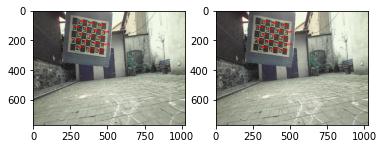

  2%|▏         | 1/45 [00:00<00:28,  1.53it/s]

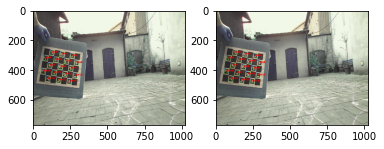

  4%|▍         | 2/45 [00:01<00:24,  1.76it/s]

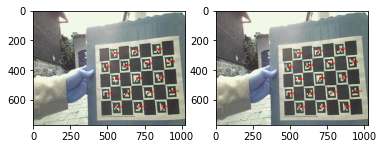

  7%|▋         | 3/45 [00:01<00:24,  1.70it/s]

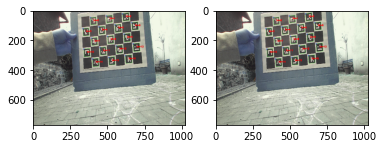

  9%|▉         | 4/45 [00:02<00:21,  1.88it/s]

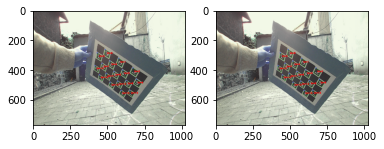

 11%|█         | 5/45 [00:02<00:19,  2.03it/s]

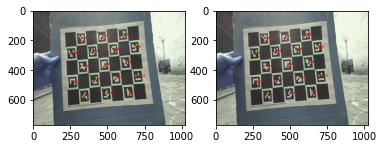

 13%|█▎        | 6/45 [00:03<00:18,  2.10it/s]

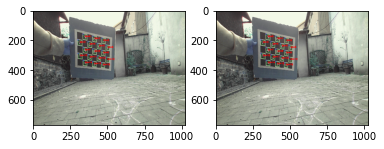

 16%|█▌        | 7/45 [00:03<00:17,  2.18it/s]

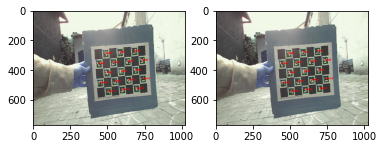

 18%|█▊        | 8/45 [00:03<00:17,  2.17it/s]

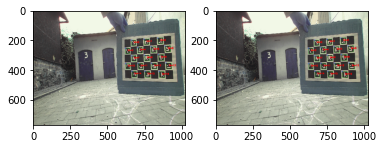

 20%|██        | 9/45 [00:04<00:16,  2.17it/s]

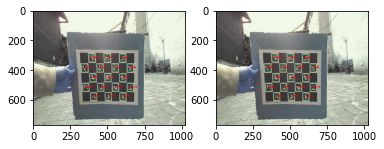

 22%|██▏       | 10/45 [00:04<00:16,  2.09it/s]

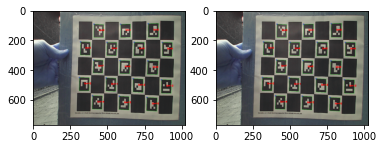

 24%|██▍       | 11/45 [00:05<00:16,  2.12it/s]

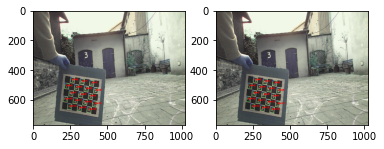

 27%|██▋       | 12/45 [00:05<00:16,  2.04it/s]

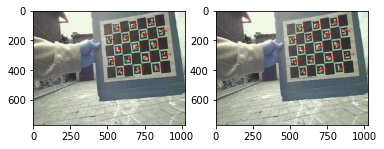

 29%|██▉       | 13/45 [00:06<00:15,  2.11it/s]

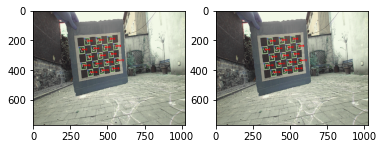

 31%|███       | 14/45 [00:06<00:14,  2.15it/s]

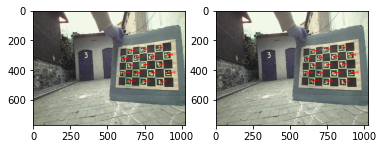

 33%|███▎      | 15/45 [00:07<00:13,  2.18it/s]

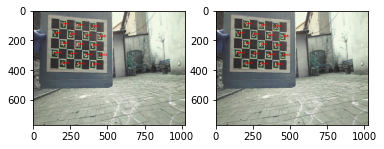

 36%|███▌      | 16/45 [00:07<00:13,  2.12it/s]

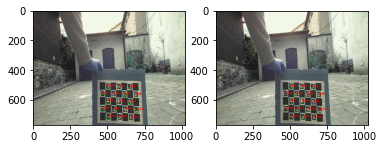

 38%|███▊      | 17/45 [00:08<00:12,  2.18it/s]

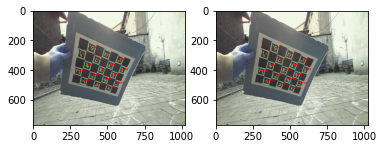

 40%|████      | 18/45 [00:08<00:12,  2.25it/s]

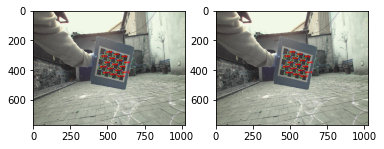

 42%|████▏     | 19/45 [00:09<00:11,  2.23it/s]

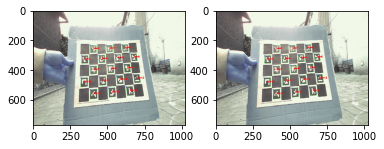

 44%|████▍     | 20/45 [00:09<00:10,  2.28it/s]

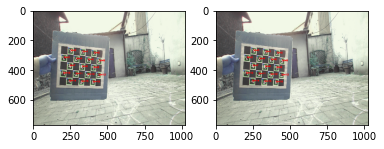

 47%|████▋     | 21/45 [00:09<00:10,  2.19it/s]

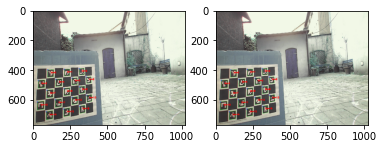

 49%|████▉     | 22/45 [00:10<00:10,  2.20it/s]

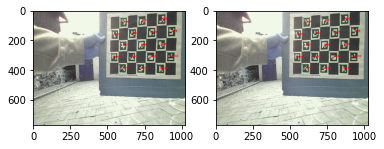

 51%|█████     | 23/45 [00:10<00:10,  2.11it/s]

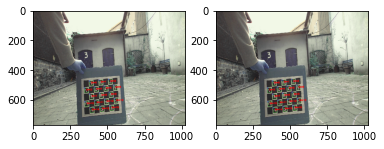

 53%|█████▎    | 24/45 [00:11<00:09,  2.14it/s]

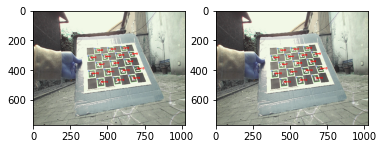

 56%|█████▌    | 25/45 [00:11<00:09,  2.20it/s]

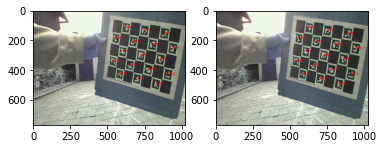

 58%|█████▊    | 26/45 [00:12<00:08,  2.22it/s]

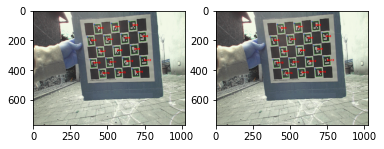

 60%|██████    | 27/45 [00:12<00:08,  2.21it/s]

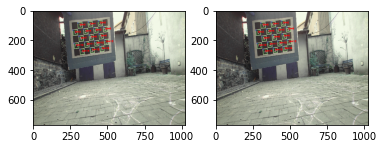

 62%|██████▏   | 28/45 [00:13<00:08,  2.12it/s]

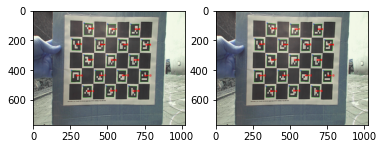

 64%|██████▍   | 29/45 [00:13<00:07,  2.20it/s]

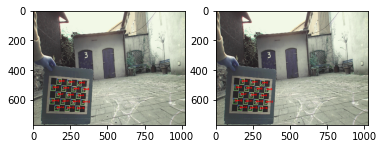

 67%|██████▋   | 30/45 [00:14<00:06,  2.22it/s]

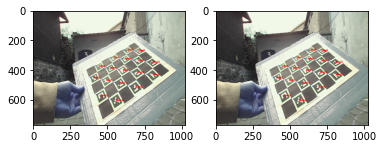

 69%|██████▉   | 31/45 [00:14<00:06,  2.23it/s]

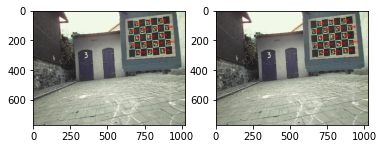

 71%|███████   | 32/45 [00:14<00:05,  2.29it/s]

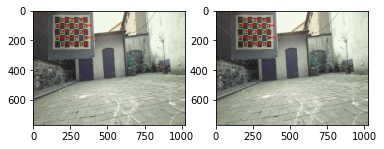

 73%|███████▎  | 33/45 [00:15<00:05,  2.34it/s]

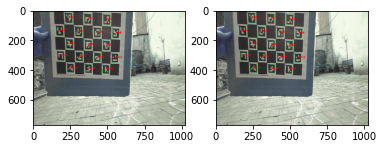

 76%|███████▌  | 34/45 [00:16<00:05,  1.97it/s]

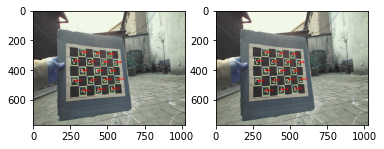

 78%|███████▊  | 35/45 [00:16<00:04,  2.01it/s]

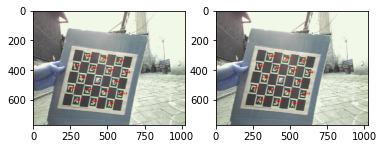

 80%|████████  | 36/45 [00:17<00:04,  2.03it/s]

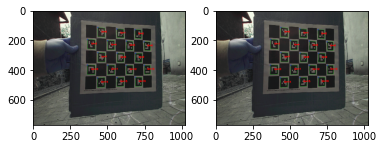

 82%|████████▏ | 37/45 [00:17<00:03,  2.09it/s]

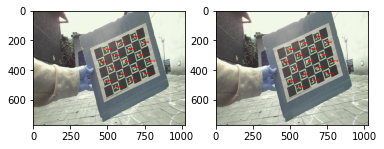

 84%|████████▍ | 38/45 [00:17<00:03,  2.04it/s]

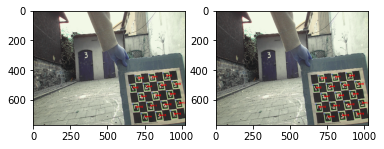

 87%|████████▋ | 39/45 [00:18<00:03,  2.00it/s]

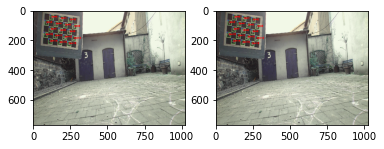

 89%|████████▉ | 40/45 [00:18<00:02,  2.04it/s]

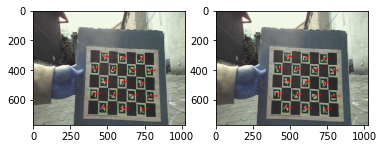

 91%|█████████ | 41/45 [00:19<00:01,  2.11it/s]

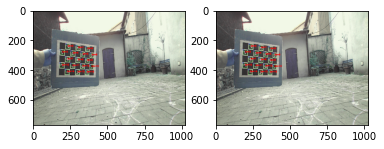

 93%|█████████▎| 42/45 [00:19<00:01,  2.18it/s]

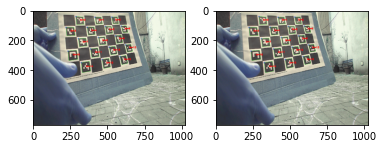

 96%|█████████▌| 43/45 [00:20<00:00,  2.18it/s]

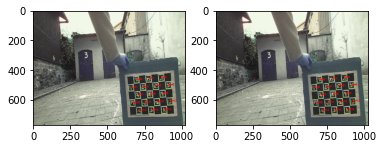

 98%|█████████▊| 44/45 [00:20<00:00,  2.10it/s]

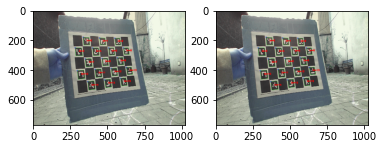

100%|██████████| 45/45 [00:21<00:00,  2.11it/s]


In [50]:
path = '/home/eryk-dev/Desktop/Engineering_Thesis_stereo_auto_recalibration/Collected_Scenes/plac/ENDING_Calibration/stereo_kalibracja_10_04_2024/cam2/*.bmp'

files = glob(path)

allCornersLeft = []
allCornersRight = []
allIdsLeft = []
allIdsRight = []

for path in  tqdm(files):

    head_tail = os.path.split(path)

    

    cam2_img = cv2.imread(path)
    cam4_img = cv2.imread(path.replace('cam2', 'cam4'))

    gray_left = cv2.cvtColor(cam2_img, cv2.COLOR_BGR2GRAY)
    gray_right = cv2.cvtColor(cam4_img, cv2.COLOR_BGR2GRAY)

    corners_left,  ids_left,  rejectedCorners1 = arucoDetector.detectMarkers(gray_left)
    corners_right, ids_right, rejectedCorners2 = arucoDetector.detectMarkers(gray_right)

    if len(corners_left) > 4 and len(corners_right) > 4:
        aruco.refineDetectedMarkers(gray_left, board, corners_left, ids_left, rejectedCorners1)
        aruco.refineDetectedMarkers(gray_right, board, corners_right, ids_right, rejectedCorners2)
  
        frame_left_copy = aruco.drawDetectedMarkers(cam2_img, corners_left, ids_left)
        frame_right_copy = aruco.drawDetectedMarkers(cam4_img, corners_right, ids_right)

        f, axarr = plt.subplots(1,2)
        axarr[0].imshow(frame_left_copy)
        axarr[1].imshow(frame_right_copy)
        plt.show()

              
    if len(corners_left) > 8 and len(corners_right) > 8:
        res2_l  = cv2.aruco.interpolateCornersCharuco(corners_left, ids_left, gray_left, board)
        res2_r = cv2.aruco.interpolateCornersCharuco(corners_right, ids_right, gray_right, board)

        if res2_l[1] is not None and res2_r[1] is not None and res2_l[2] is not None and len(res2_l[1])>3 and max(ids_left) <= max(board.getIds()) and max(ids_left) <= max(board.getIds()):

            if is_slice_in_list(numpy.squeeze(ids_left).tolist(), corner_ids) and is_slice_in_list(numpy.squeeze(ids_right).tolist(), corner_ids): # all left/right corners are detected
                    params_l, board_rot_deg_l = get_parameters(corners_left, numpy.squeeze(ids_left).tolist(), corner_ids, img_shape, board_shape)
                    params_r, board_rot_deg_r = get_parameters(corners_right, numpy.squeeze(ids_right).tolist(), corner_ids, img_shape, board_shape)

                
                    allCornersLeft.append(res2_l[1])
                    allCornersRight.append(res2_r[1])

                    allIdsLeft.append(res2_l[2])
                    allIdsRight.append(res2_r[2])





In [47]:
print("CAMERA CALIBRATION")

#flags = (cv2.CALIB_USE_INTRINSIC_GUESS + cv2.CALIB_RATIONAL_MODEL + cv2.CALIB_FIX_ASPECT_RATIO)
flags = (cv2.CALIB_RATIONAL_MODEL)


(ret_left, camera_matrix_left, distortion_coefficients_left, _, _, _, _,
_) = aruco.calibrateCameraCharucoExtended(
                charucoCorners=allCornersLeft,
                charucoIds=allIdsLeft,
                board=board,
                imageSize=img_shape,
                cameraMatrix=None, #cameraMatrix=cameraMatrixInit.copy(),
                distCoeffs=None, #distCoeffs=distCoeffsInit.copy(),
                flags=flags,
                criteria=(cv2.TERM_CRITERIA_EPS & cv2.TERM_CRITERIA_COUNT, 10000, 1e-9))

(ret_right, camera_matrix_right, distortion_coefficients_right, _, _, _, _,
_) = aruco.calibrateCameraCharucoExtended(
                charucoCorners=allCornersRight,
                charucoIds=allIdsRight,
                board=board,
                imageSize=img_shape,
                cameraMatrix=None, #cameraMatrix=cameraMatrixInit.copy(),
                distCoeffs=None, #distCoeffs=distCoeffsInit.copy(),
                flags=flags,
                criteria=(cv2.TERM_CRITERIA_EPS & cv2.TERM_CRITERIA_COUNT, 10000, 1e-9))


shared_corners_l, shared_ids_l, shared_corners_r, \
    shared_ids_r = getSharedFetures(
        allCornersLeft, 
        allIdsLeft, 
        allCornersRight, 
        allIdsRight, 
        board)


imgPoints_l, objPoints_l = calculateImgPointsObjPoints(shared_ids_l, shared_corners_l, board)
imgPoints_r, objPoints_r = calculateImgPointsObjPoints(shared_ids_r, shared_corners_r, board)


ret, M1, d1, M2, d2, R, T, E, F = cv2.stereoCalibrate(
    objPoints_l, 
    imgPoints_l,
    imgPoints_r,
    camera_matrix_left, distortion_coefficients_left, 
    camera_matrix_right, distortion_coefficients_right, 
    np.array(img_shape, np.int16),
    criteria=(cv2.TERM_CRITERIA_EPS & cv2.TERM_CRITERIA_COUNT, 10000, 1e-10), 
    flags=flags
)

print('Intrinsic_mtx_1', M1)
print('Intrinsic_mtx_2', M2)

print('dist_1', d1)
print('dist_2', d2)

print('R', R)
print('T', T)
print('E', E)
print('F', F)

print('Baseline cm', np.linalg.norm(T))

print("error: {}".format(ret))

CAMERA CALIBRATION
Intrinsic_mtx_1 [[681.02845472   0.         514.71426592]
 [  0.         917.64645075 433.76574591]
 [  0.           0.           1.        ]]
Intrinsic_mtx_2 [[681.02845472   0.         514.71426592]
 [  0.         917.64645075 433.76574591]
 [  0.           0.           1.        ]]
dist_1 [[ 9.09911180e+00 -3.43371968e+01  2.08812508e-02 -2.84515605e-03
   1.78850714e+02  8.42089429e+00 -3.19432002e+01  1.66648450e+02
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
dist_2 [[ 9.09911180e+00 -3.43371968e+01  2.08812508e-02 -2.84515605e-03
   1.78850714e+02  8.42089429e+00 -3.19432002e+01  1.66648450e+02
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
R [[ 1.00000000e+00  1.26966877e-16 -3.72182771e-16]
 [-1.26966877e-16  1.00000000e+00 -2.17611325e-16]
 [ 3.72182771e-16  2.17611325e-16  1.00000000e+00]]
T [[ 1.23636849e-17]
 [ 8.52397881e-17]
 [-1.29565465e-16